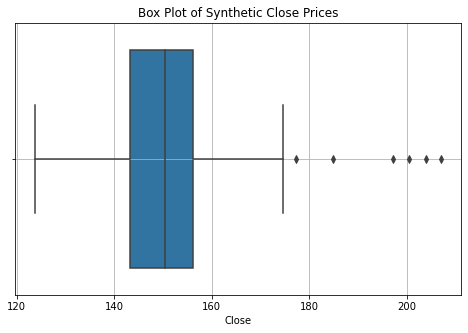

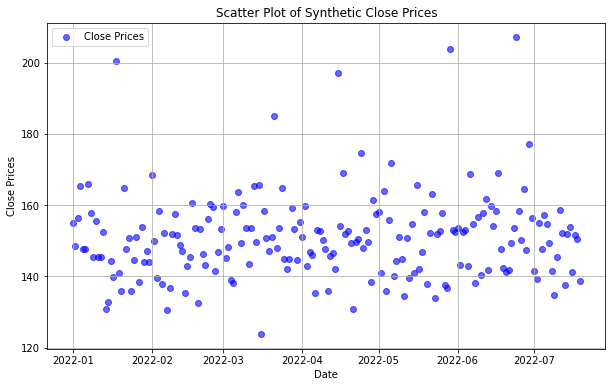

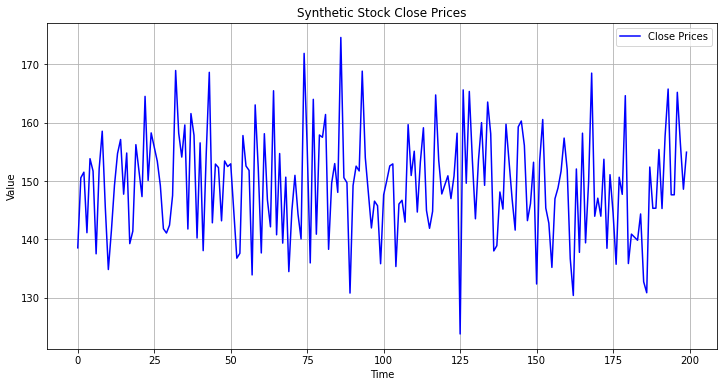

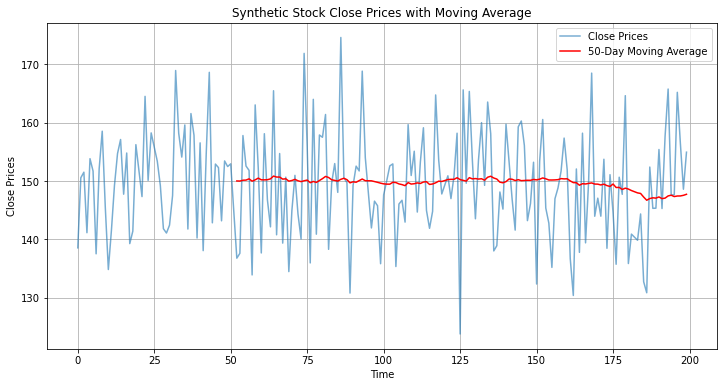

<Figure size 864x576 with 0 Axes>

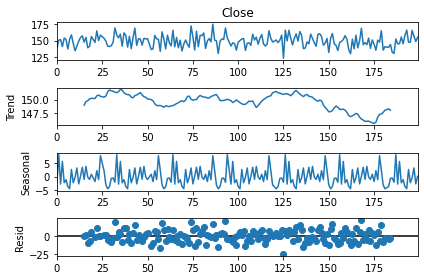

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate Synthetic Dataset
np.random.seed(42)
n = 200
dates = pd.date_range(start='2022-01-01', periods=n)
close_prices = np.random.normal(loc=150, scale=10, size=n)  # Normal distribution
outliers = np.random.choice(n, size=5, replace=False)
close_prices[outliers] += np.random.normal(loc=50, scale=5, size=5)  # Inject outliers

# Create DataFrame
data = pd.DataFrame({'Date': dates, 'Close': close_prices})

# Box Plot to Check Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Close'])
plt.title('Box Plot of Synthetic Close Prices')
plt.grid(True)
plt.show()

# Scatter Plot to Check Distribution
plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], data['Close'], color='blue', alpha=0.6, label='Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.title('Scatter Plot of Synthetic Close Prices')
plt.legend()
plt.grid(True)
plt.show()

# Reverse the order to maintain chronological order
data = data.iloc[::-1].reset_index(drop=True)

# Handling Missing Values
data.dropna(inplace=True)  # Drop rows with missing values
data['Close'].fillna(data['Close'].mean(), inplace=True)  # Fill NaNs in 'Close'

# Handling Outliers using IQR
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Close'] >= lower_bound) & (data['Close'] <= upper_bound)]

# Extract Close Prices
close_prices = data['Close'].values

data['Normalized_Close'] = close_prices / np.max(close_prices)  # Normalize data

def plot_time_series(data, title='Time Series Data', xlabel='Time', ylabel='Value'):
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Close Prices', color='blue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Simple Line Plot of Closing Prices
plot_time_series(data['Close'], title='Synthetic Stock Close Prices')

# Moving Average (Smoothing)
window_size = 50
data['Moving_Avg'] = data['Close'].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Prices', alpha=0.6)
plt.plot(data['Moving_Avg'], label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Time')
plt.ylabel('Close Prices')
plt.title('Synthetic Stock Close Prices with Moving Average')
plt.legend()
plt.grid(True)
plt.show()

# Seasonal Decomposition
result = seasonal_decompose(data['Close'], model='additive', period=30)
plt.figure(figsize=(12, 8))
result.plot()
plt.show()
